In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataset = pd.read_csv('churn_data.csv')

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


#### Removing NaN

In [6]:
dataset.isna().any() #columns having atleast one NaN in them

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [7]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
dataset.shape

(27000, 31)

In [0]:
dataset = dataset[pd.notnull(dataset['age'])]    #Return all the rows in which a particular column has no null values

In [10]:
dataset.shape

(26996, 31)

In [0]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [12]:
dataset.shape

(26996, 29)

##Exploratory Data Analysis

### Feature Histogram

In [0]:
dataset2 = dataset.drop(columns = ['user', 'churn'])

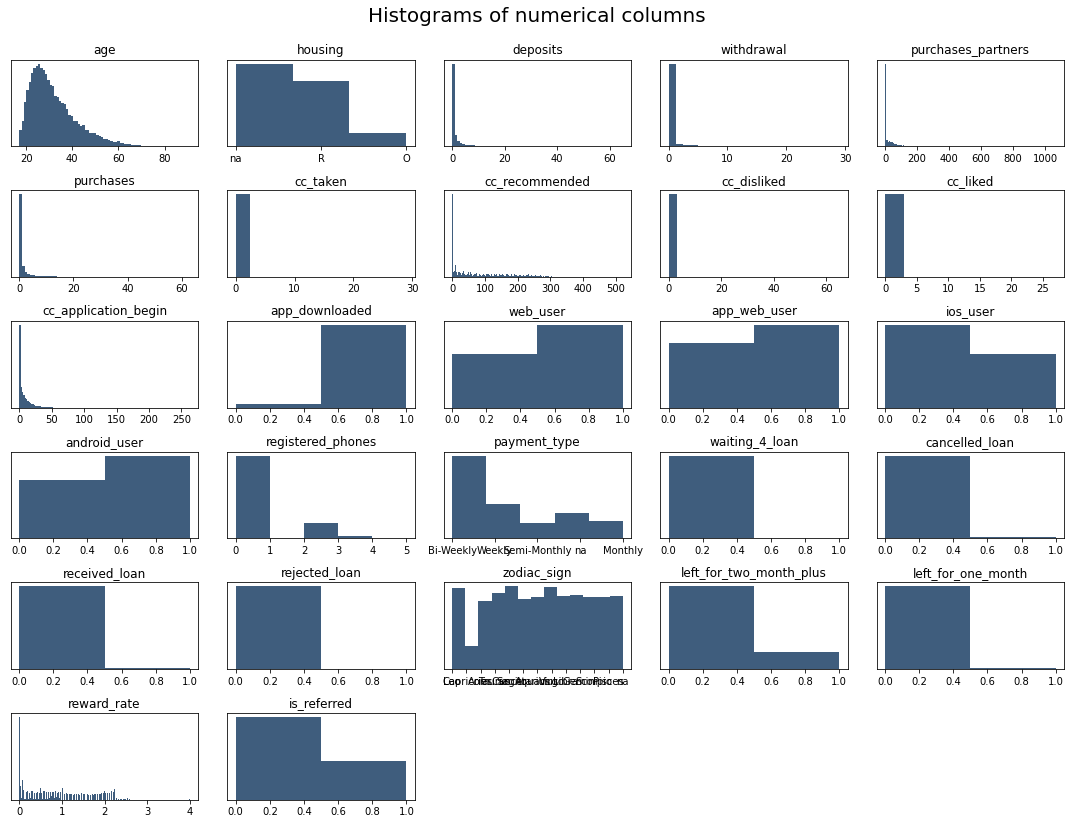

In [14]:
fig = plt.figure(figsize = (15,12))
plt.suptitle('Histograms of numerical columns', fontsize = 20)
for i in range(1, dataset2.shape[1] + 1):
  plt.subplot(6, 5, i)
  f = plt.gca()
  f.axes.get_yaxis().set_visible(False)
  f.set_title(dataset2.columns.values[i - 1])

  vals = np.size(dataset2.iloc[:, i - 1].unique())

  plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = '#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

###Pie Plots

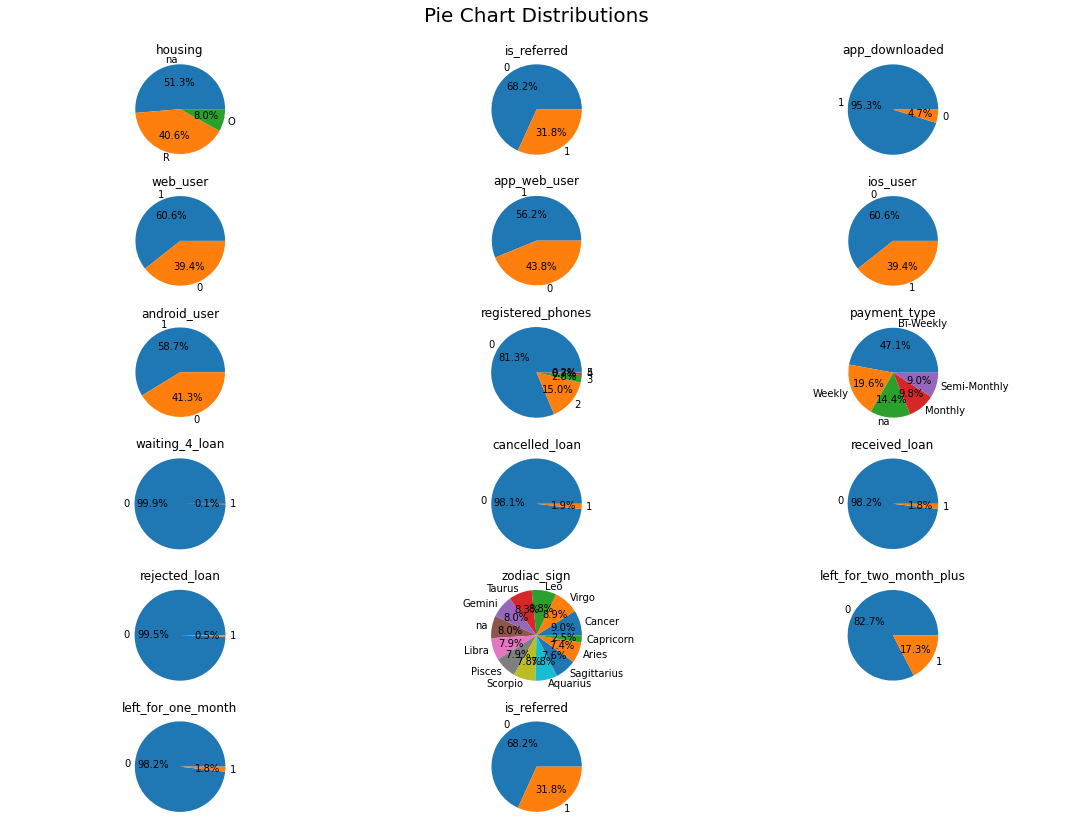

In [15]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'registered_phones',
                    'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
                    'left_for_one_month', 'is_referred']]

fig = plt.figure(figsize = (15,12))
plt.suptitle('Pie Chart Distributions', fontsize = 20)
for i in range(1, dataset2.shape[1] + 1):
  plt.subplot(6, 3, i)
  f = plt.gca()
  f.axes.get_yaxis().set_visible(False)
  f.set_title(dataset2.columns.values[i - 1])

  values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
  index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index

  plt.pie(values, labels = index, autopct = '%1.1f%%')
  plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [16]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()  #for those rows where waiting_4_loan is '1', what is the churn value?

0    27
1     8
Name: churn, dtype: int64

In [17]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [18]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [19]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [20]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

So the distrubutions in the particular fields are even, and need not be excluded.

###Correlation Plot

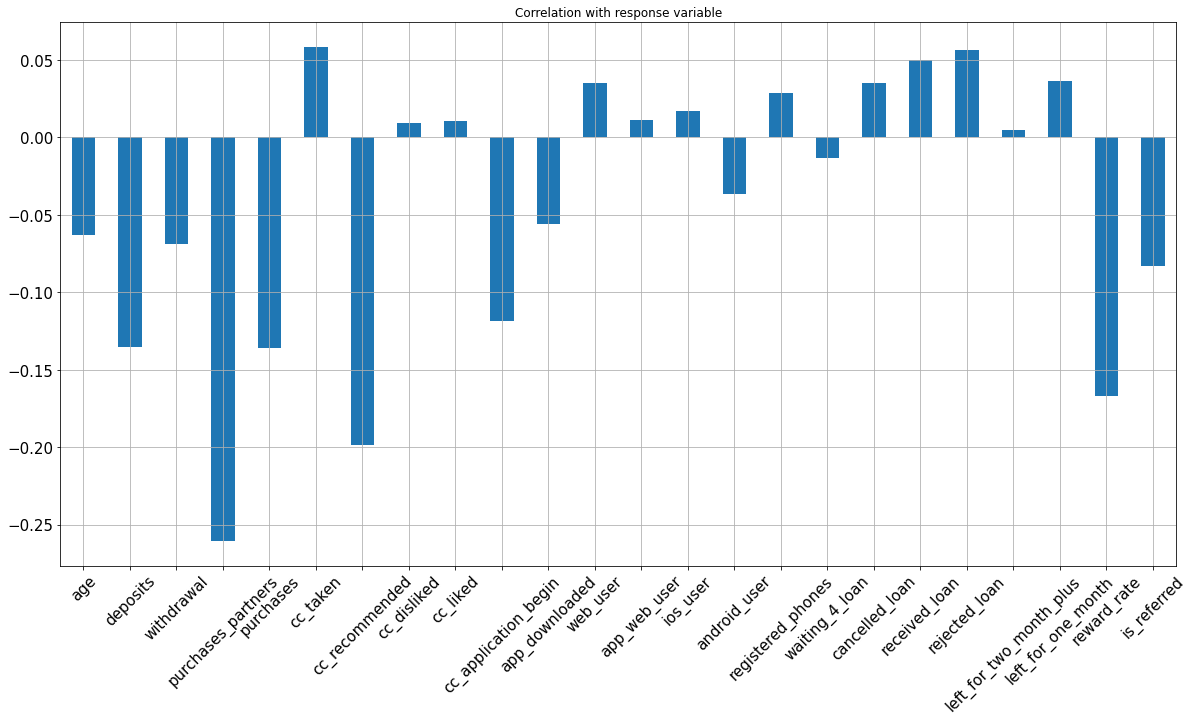

In [21]:
#To remove the categorical variables and keep the binary variable
dataset.drop(columns = ['churn', 'user', 'housing', 'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
    figsize = (20,10),
    title = 'Correlation with response variable',
    fontsize = 15,
    rot = 45,
    grid = True
)

- Age: Age is negaitively correlated to the response variable, the smaller the age the more likely it is for the response variable to be 1. The younger you are the most likely for you to churn.    
- Same goes to deposits, withdrawals, purchase, purchase_partners.  
- cc-taken: If you take the credit card with us, it is going to be more likely to churn.  
- cc-recomended: The less no.of recomendation you have, the more likely you are to churn.
- Dislike and like are both positively correlated, the more dislikes and likes you the have the more likely you are to churn. It is weakly correlated.
- cc-application_begin and app_donwloaded are negatively correlated. If the customer has begin the application or downloaded the app, the customer is less likely to churn.  
- An web_user, app_web_user or iOS_user is more likely to churn than an android_user.  
- If the customer has registered more phones, he/she is more likely to churn.
- Cancelled_loan, received_loan, rejected_loan, left_for_two_month_plus, left_for_month are all positively correlated. 

###Correlation Matrix

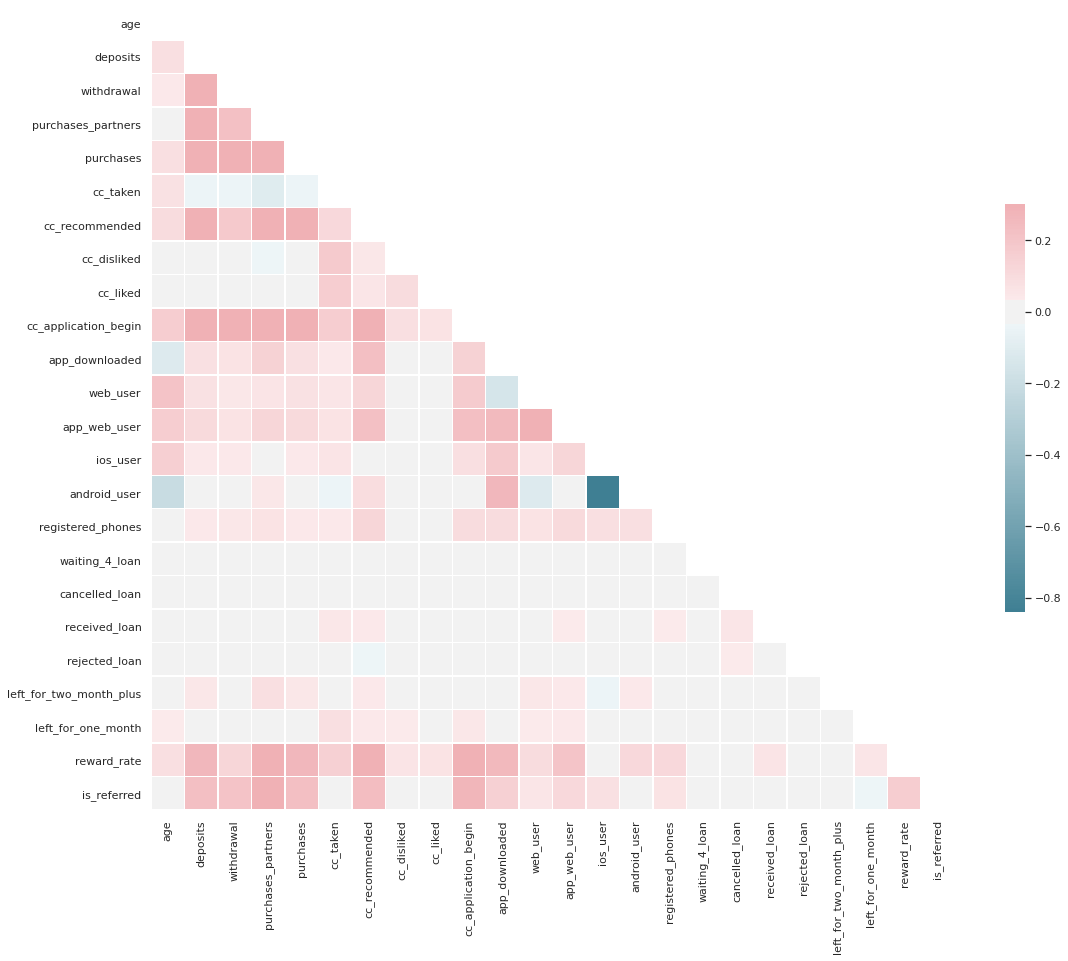

In [22]:
sns.set(style='white')
corr = dataset.drop(columns = ['user', 'churn']).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (18,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
dataset = dataset.drop(columns = ['app_web_user'])

In [0]:
user_indentifier = dataset['user']
dataset = dataset.drop(columns = ['user'])


In [25]:
#One Hot Encoding
dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [26]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [0]:
dataset = dataset.drop(columns = ['housing_na', 'payment_type_na', 'zodiac_sign_na'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = ['churn']),
                                                    dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

###Balancing & Feature Scaling

In [29]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [0]:
#splitting dataset into positive and negative values
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [0]:
# Selecting which value have higher list and which have lower
import random
if len(pos_index) > len(neg_index):
  higher = pos_index
  lower = neg_index
else: 
  higher = neg_index
  lower = pos_index
# Making the higher as big as the lower by chopping down of the items randomly
random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


In [33]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11697,-0.620163,-0.358425,-0.294436,-0.594057,-0.358032,-0.162747,-0.909512,-0.059775,-0.075275,-0.549503,0.225882,-1.254058,-0.811843,0.847588,-0.469414,-0.032615,-0.142735,-0.144761,-0.072698,-0.458334,-0.140475,-0.519134,-0.676263,-0.295511,1.220474,-0.940999,-0.333747,-0.311772,1.998603,3.486651,-0.2792,-0.315215,-0.158096,-0.288972,-0.312419,-0.301070,-0.290786,-0.29293,-0.291803,-0.296293,-0.315429
19770,-0.418667,-0.358425,-0.294436,-0.642522,-0.358032,-0.162747,0.314812,1.224812,-0.075275,-0.549503,0.225882,0.797411,-0.811843,0.847588,-0.469414,-0.032615,-0.142735,-0.144761,-0.072698,-0.458334,-0.140475,0.943769,-0.676263,-0.295511,-0.819354,1.062700,-0.333747,-0.311772,-0.500350,-0.286808,-0.2792,-0.315215,-0.158096,-0.288972,-0.312419,3.321491,-0.290786,-0.29293,-0.291803,-0.296293,-0.315429
8356,0.286568,-0.358425,-0.294436,-0.642522,-0.358032,-0.162747,1.992590,-0.059775,-0.075275,-0.240763,0.225882,0.797411,-0.811843,0.847588,-0.469414,-0.032615,-0.142735,-0.144761,-0.072698,-0.458334,-0.140475,1.382640,-0.676263,-0.295511,-0.819354,-0.940999,-0.333747,-0.311772,-0.500350,-0.286808,-0.2792,-0.315215,-0.158096,-0.288972,-0.312419,-0.301070,-0.290786,-0.29293,-0.291803,-0.296293,3.170281
17887,0.588812,-0.358425,-0.294436,0.035997,-0.358032,-0.162747,-0.183987,-0.059775,-0.075275,-0.009208,0.225882,0.797411,1.231765,-1.179819,-0.469414,-0.032615,-0.142735,-0.144761,-0.072698,-0.458334,-0.140475,-0.652126,1.478715,-0.295511,1.220474,-0.940999,-0.333747,-0.311772,1.998603,-0.286808,-0.2792,-0.315215,-0.158096,-0.288972,-0.312419,-0.301070,-0.290786,-0.29293,-0.291803,3.375034,-0.315429
25153,-0.821659,-0.248144,-0.294436,-0.109400,-0.245770,-0.162747,-0.580758,-0.059775,-0.075275,-0.240763,0.225882,-1.254058,1.231765,-1.179819,-0.469414,-0.032615,-0.142735,-0.144761,-0.072698,-0.458334,-0.140475,-0.559032,1.478715,-0.295511,1.220474,-0.940999,-0.333747,-0.311772,1.998603,-0.286808,-0.2792,-0.315215,-0.158096,-0.288972,-0.312419,-0.301070,3.438953,-0.29293,-0.291803,-0.296293,-0.315429


In [34]:
X_test.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2835,-0.015676,0.854663,-0.294436,-0.618289,0.876847,1.955091,1.233055,-0.059775,-0.075275,1.766049,0.225882,-1.254058,-0.811843,0.847588,-0.469414,-0.032615,-0.142735,-0.144761,-0.072698,-0.458334,-0.140475,0.943769,-0.676263,-0.295511,-0.819354,-0.940999,-0.333747,-0.311772,1.998603,-0.286808,-0.2792,-0.315215,-0.158096,-0.288972,-0.312419,-0.30107,-0.290786,3.413785,-0.291803,-0.296293,-0.315429
21022,-0.720911,-0.358425,-0.294436,2.459279,-0.358032,-0.162747,1.697845,-0.059775,-0.075275,-0.395133,0.225882,0.797411,-0.811843,0.847588,-0.469414,-0.032615,-0.142735,-0.144761,13.755463,-0.458334,-0.140475,1.076760,-0.676263,-0.295511,1.220474,1.062700,-0.333747,-0.311772,-0.500350,-0.286808,-0.2792,-0.315215,-0.158096,3.460538,-0.312419,-0.30107,-0.290786,-0.292930,-0.291803,-0.296293,-0.315429
5592,1.495542,0.854663,1.606454,-0.642522,0.876847,-0.162747,0.428176,2.509399,-0.075275,2.074789,0.225882,-1.254058,-0.811843,0.847588,-0.469414,-0.032615,-0.142735,-0.144761,-0.072698,-0.458334,-0.140475,0.943769,1.478715,-0.295511,1.220474,1.062700,-0.333747,-0.311772,-0.500350,-0.286808,-0.2792,-0.315215,-0.158096,-0.288972,-0.312419,-0.30107,-0.290786,-0.292930,-0.291803,3.375034,-0.315429
15773,0.085072,-0.358425,-0.294436,-0.448660,-0.358032,-0.162747,-1.000203,-0.059775,-0.075275,-0.549503,0.225882,-1.254058,1.231765,-1.179819,1.687648,-0.032615,-0.142735,-0.144761,-0.072698,-0.458334,-0.140475,-0.519134,1.478715,-0.295511,-0.819354,-0.940999,-0.333747,-0.311772,1.998603,-0.286808,-0.2792,-0.315215,6.325281,-0.288972,-0.312419,-0.30107,-0.290786,-0.292930,-0.291803,-0.296293,-0.315429
15123,-1.023154,0.303260,-0.294436,3.162031,0.315538,-0.162747,1.731854,-0.059775,-0.075275,1.997604,0.225882,0.797411,1.231765,-1.179819,-0.469414,-0.032615,-0.142735,-0.144761,-0.072698,2.181813,-0.140475,1.342743,1.478715,-0.295511,1.220474,1.062700,-0.333747,-0.311772,-0.500350,-0.286808,-0.2792,-0.315215,-0.158096,-0.288972,3.200825,-0.30107,-0.290786,-0.292930,-0.291803,-0.296293,-0.315429


## Model Training

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [38]:
accuracy_score(y_test, y_pred)

0.6112962962962963

In [39]:
precision_score(y_test, y_pred)

0.5212330921673483

In [40]:
recall_score(y_test, y_pred)

0.7417188898836168

In [41]:
f1_score(y_test, y_pred)

0.6122298171069647

Test DataSccuracy: 0.61130


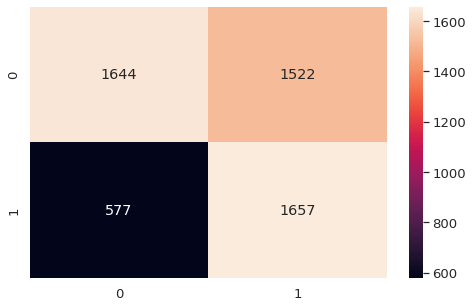

In [42]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,5))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot = True, fmt = 'g')
print("Test DataSccuracy: %0.5f" % accuracy_score(y_test, y_pred))

In [0]:
# Applying k-fold validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train,
                             y = y_train,
                             cv = 10)

In [45]:
accuracies.mean()

0.6430089485458613

In [47]:
# Analysing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],
          axis = 1)

,features,coef
0,age,-0.155187
1,deposits,0.805479
2,withdrawal,0.035108
3,purchases_partners,-0.740010
4,purchases,-0.952200
5,cc_taken,0.085978
6,cc_recommended,0.101277
7,cc_disliked,0.004997
8,cc_liked,0.005348
9,cc_application_begin,0.022333


###Feature Selection

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [0]:
# Model to Test
classifier = LogisticRegression()
rfe = RFE(classifier, 20)

In [0]:
rfe = rfe.fit(X_train, y_train)

In [51]:
print(rfe.support_)

[ True  True False  True  True  True  True False False False  True  True
  True  True  True False  True  True  True  True False  True False False
  True  True  True  True False False False False False False False False
 False False False False False]


In [52]:
X_train.columns

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo'],
      dtype='object')

In [55]:
X_train.columns[rfe.support_] # 20 Columns that are actually included

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'reward_rate', 'housing_R',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly'],
      dtype='object')

In [56]:
rfe.ranking_

array([ 1,  1,  5,  1,  1,  1,  1, 19, 18, 10,  1,  1,  1,  1,  1,  7,  1,
        1,  1,  1,  3,  1, 12,  4,  1,  1,  1,  1,  9, 22, 11, 14,  6, 15,
       21,  8,  2, 20, 17, 16, 13])

In [57]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [59]:
accuracy_score(y_test, y_pred)

0.607037037037037

In [60]:
precision_score(y_test, y_pred)

0.5174129353233831

In [61]:
recall_score(y_test, y_pred)

0.7448522829006267

In [62]:
f1_score(y_test, y_pred)

0.6106422018348624

In [63]:
# Analysing Coefficients
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],
          axis = 1)

,features,coef
0,age,-0.155798
1,deposits,0.836761
2,purchases_partners,-0.736719
3,purchases,-0.957197
4,cc_taken,0.092240
5,cc_recommended,0.112046
6,app_downloaded,-0.049532
7,web_user,0.132280
8,ios_user,0.156516
9,android_user,0.087053


###Final Results

In [0]:
final_results = pd.concat([y_test, user_indentifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop = True)

In [66]:
final_results.head(10)

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,1
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
5,28827,0.0,0
6,58305,1.0,0
7,2351,0.0,1
8,11790,0.0,1
9,46727,0.0,0


In [67]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,1
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
